In [1]:
#Mounting google and authenticating
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

Mounted at /content/gdrive


In [2]:
!cp /mydrive/music\ project/chp_op.wav ./
!cp /mydrive/music\ project/chpn_p24.wav ./
!cp /mydrive/music\ project/direct_float.wav ./


In [3]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

(128, 13360) chp_op


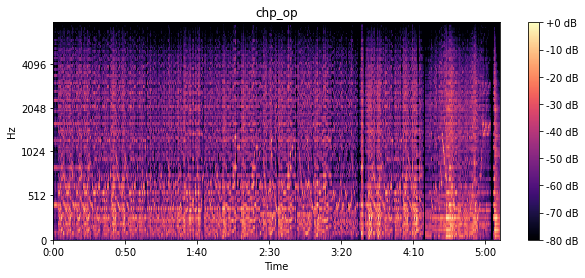

In [ ]:
#db in ref=np.max
y, sr = librosa.load('/content/chp_op.wav')
import numpy as np
spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
spect = librosa.power_to_db(spect, ref=np.max)

genre_name = 'chp_op'
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

(128, 13360) chp_op


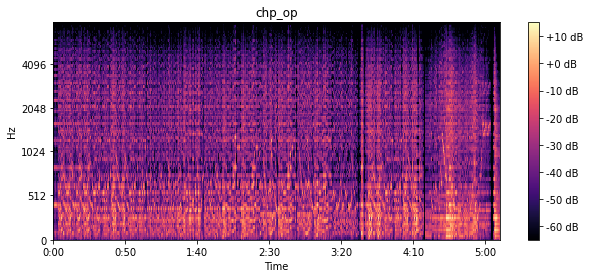

In [ ]:
#db in ref=1.0

y, sr = librosa.load('/content/chp_op.wav')
import numpy as np
spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
#spect = librosa.power_to_db(spect, ref=np.max)
spect = librosa.power_to_db(spect, ref=1.0)

genre_name = 'chp_op'
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

In [ ]:
#saving as png
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = librosa.display.specshow(spect, ax=ax, y_axis='mel', fmax=8000, x_axis='time')
fig.savefig('spec1.png')

In [ ]:
print(spect.dtype)
print(type(y))
print(y.dtype)
sr

float32
<class 'numpy.ndarray'>
float32


22050

In [ ]:
import scipy
from scipy.io.wavfile import write

#First Approach audio conversion
audio_path = '/content/audio/output.wav'
wav = librosa.db_to_power(spect, ref=1.0)
wav = librosa.feature.inverse.mel_to_audio (M=wav, hop_length=512, sr=sr)
#wav *= 32767 / max (0.01, np.max(np.abs(wav)))
#scipy.io.wavfile.write (audio_path, 16000, wav.astype(np.int16))
write (audio_path, sr, wav.astype(np.float32))

In [ ]:
#Second approach audio conversion
wav *= 32767 / max (0.01, np.max(np.abs(wav)))
write (audio_path, sr, wav.astype(np.int16))

In [ ]:
!cp /content/audio/output.wav /mydrive/music\ project/

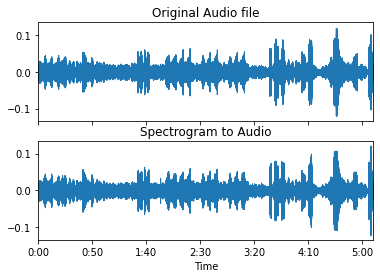

In [6]:
#spectrogram to audio plot
import matplotlib.pyplot as plt
y, sr = librosa.load('chp_op.wav')
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveplot(y, sr=sr, ax=ax[0])
ax[0].set(title='Original Audio file')
ax[0].label_outer()

y, sr = librosa.load('direct_float.wav')
librosa.display.waveplot(y, sr=sr, ax=ax[1])
ax[1].set(title='Spectrogram to Audio')
ax[1].label_outer()